# TensorFlow for linear fitting, ROOT is obviously better for this sort of thing

code: https://github.com/MorvanZhou/tutorials/tree/master/tensorflowTUT
playlist: https://www.youtube.com/playlist?list=PLXO45tsB95cJHXaDKpbwr5fC_CCYylw1f
Video for this notebook


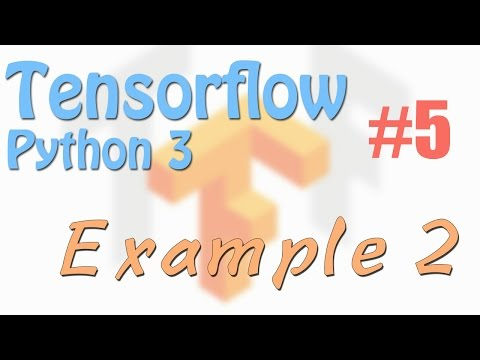

In [30]:
from IPython.display import YouTubeVideo
print ("code: https://github.com/MorvanZhou/tutorials/tree/master/tensorflowTUT")
print ("playlist: https://www.youtube.com/playlist?list=PLXO45tsB95cJHXaDKpbwr5fC_CCYylw1f")
print "Video for this notebook"
YouTubeVideo('PFijwks2K6o')

In [31]:
import tensorflow as tf
import pandas as pd
import sys
import tqdm
if 'seaborn' not in sys.modules:
    %pylab inline
    import seaborn
sess = tf.InteractiveSession()

# Generating some data

SpearmanrResult(correlation=0.92165082260329023, pvalue=6.8850568554190274e-207)

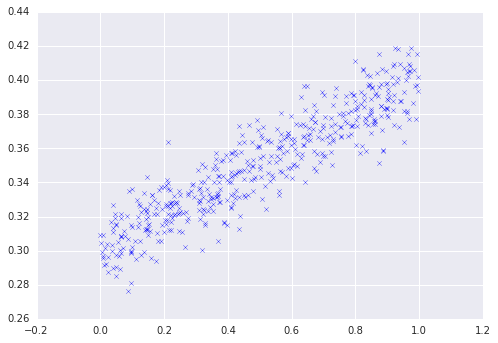

In [32]:
n_data = 500
x_data = np.random.rand(n_data).astype(np.float32)
y_data = x_data*0.1 + 0.3 + np.random.normal(loc=0, scale=0.013, size=n_data)
plt.scatter(x_data, y_data, marker='x')
from scipy import stats
stats.spearmanr(x_data,y_data)

# Fit the data with root, to get an idea of the stat variation in this set

In [33]:
# All preamble to configure plotting ...
import ROOT
import rootnotes
import root_pandas
import array
c = rootnotes.canvas()
ROOT.gStyle.SetOptStat('RMe')
ROOT.gStyle.SetOptFit(1111) # Chi2, CHi2 prob, params and uncertainties
ROOT.gStyle.SetStatY(0.8) # move the box out the way of the fit
ROOT.gStyle.SetStatX(0.4)
ROOT.gStyle.SetStatW(0.2)
ROOT.gStyle.SetStatH(0.2)

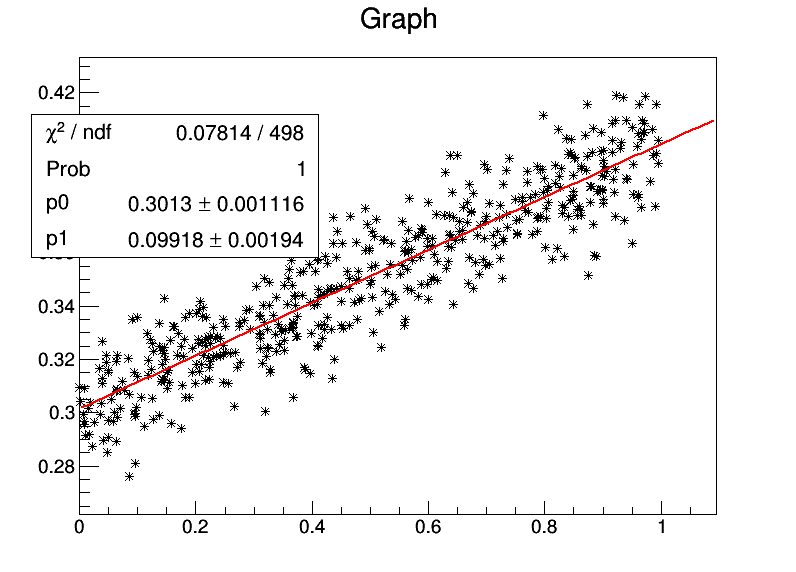

<ROOT.TCanvas object ("icanvas") at 0x5b638a0>

In [34]:
# one line to prepare something ROOT can fit ...
graph = ROOT.TGraph(len(x_data),array.array('f',x_data),array.array('f',y_data))
graph.Draw('A*') #A = axis, * = point shape *
# Least squares with Migrad etc.
graph.Fit("pol1")
c

# Same thing with TensorFlow

In [35]:
m = tf.Variable(tf.random_uniform([1],-1.,1.), name="var_m")
c = tf.Variable(tf.random_uniform([1],-0.5,0.5), name="var_c")

y = m*x_data + c
penalty = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(penalty)

In [36]:
init = tf.initialize_all_variables()
sess.run(init)

In [37]:
for step in tqdm.tqdm(range(200)):
    sess.run(train)
    if step%20==0:
        print(sess.run(penalty),sess.run(m),sess.run(c))

100%|██████████| 200/200 [00:00<00:00, 2162.24it/s]

(0.022445023, array([ 0.59829998], dtype=float32), array([ 0.01397657], dtype=float32))
(0.0015839672, array([ 0.22905263], dtype=float32), array([ 0.23207892], dtype=float32))
(0.00024960394, array([ 0.13238212], dtype=float32), array([ 0.28359461], dtype=float32))
(0.0001623775, array([ 0.10766597], dtype=float32), array([ 0.29676583], dtype=float32))
(0.00015667558, array([ 0.10134669], dtype=float32), array([ 0.30013338], dtype=float32))
(0.00015630282, array([ 0.09973102], dtype=float32), array([ 0.30099437], dtype=float32))
(0.00015627845, array([ 0.09931792], dtype=float32), array([ 0.30121452], dtype=float32))
(0.00015627689, array([ 0.09921229], dtype=float32), array([ 0.30127081], dtype=float32))
(0.00015627677, array([ 0.09918529], dtype=float32), array([ 0.30128518], dtype=float32))
(0.00015627673, array([ 0.0991784], dtype=float32), array([ 0.30128887], dtype=float32))


In [38]:
writer = tf.train.SummaryWriter('/tmp/test', sess.graph)

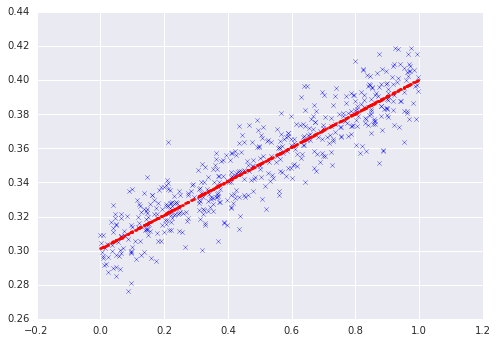

In [39]:
y_eval = sess.run(y)
plt.scatter(x_data, y_data, marker='x')
plt.scatter(x_data, y_eval, marker='.', color='red')

In [40]:
%load_ext watermark
%watermark -a ThinkBig -d -t -v -p numpy,pandas -g

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
ThinkBig 2016-10-14 09:21:02 

CPython 2.7.12
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
Git hash:
